
Episodio 1:
[[0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0.1]
 [0.  0. ]]

Episodio 2:
[[0.   0.  ]
 [0.   0.  ]
 [0.   0.01]
 [0.   0.19]
 [0.   0.  ]]

Episodio 3:
[[0.   0.  ]
 [0.   0.  ]
 [0.   0.03]
 [0.   0.27]
 [0.   0.  ]]

Episodio 4:
[[0.   0.  ]
 [0.   0.  ]
 [0.   0.05]
 [0.   0.34]
 [0.   0.  ]]

Episodio 5:
[[0.   0.  ]
 [0.   0.01]
 [0.   0.07]
 [0.   0.41]
 [0.   0.  ]]

Episodio 6:
[[0.   0.  ]
 [0.   0.01]
 [0.   0.13]
 [0.01 0.47]
 [0.   0.  ]]

Episodio 7:
[[0.   0.  ]
 [0.   0.02]
 [0.   0.16]
 [0.01 0.52]
 [0.   0.  ]]

Episodio 8:
[[0.   0.  ]
 [0.   0.04]
 [0.   0.19]
 [0.01 0.57]
 [0.   0.  ]]

Episodio 9:
[[0.   0.01]
 [0.   0.05]
 [0.   0.22]
 [0.01 0.61]
 [0.   0.  ]]

Episodio 10:
[[0.   0.01]
 [0.   0.06]
 [0.   0.25]
 [0.01 0.65]
 [0.   0.  ]]

Episodio 11:
[[0.   0.02]
 [0.   0.08]
 [0.   0.29]
 [0.01 0.69]
 [0.   0.  ]]

Episodio 12:
[[0.   0.02]
 [0.   0.1 ]
 [0.   0.32]
 [0.01 0.72]
 [0.   0.  ]]

Episodio 13:
[[0.   0.03]
 [0.   0.12]
 [0.   0.35]
 [0.01

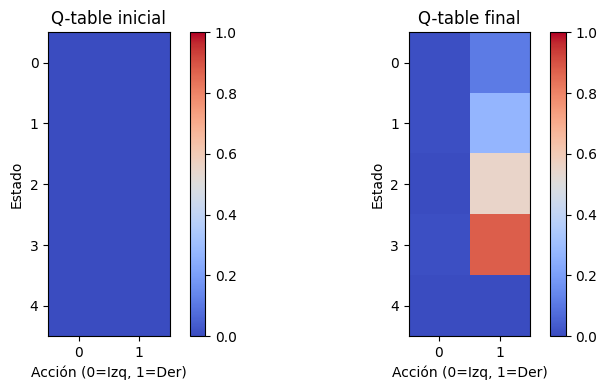

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parámetros
n_states = 5
actions = [0, 1]        # 0 = izquierda, 1 = derecha
alpha = 0.1
gamma = 0.9
epsilon = 0.2
episodes = 20

# Q-table: estados x acciones
Q = np.zeros((n_states, len(actions)))

# Guardar estado inicial (para plot)
Q_initial = Q.copy()

# Función para elegir acción (ε-greedy)
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)
    else:
        return np.argmax(Q[state])

# Función para simular acción
def step(state, action):
    if action == 0:
        next_state = max(state - 1, 0)
    else:
        next_state = min(state + 1, n_states - 1)

    reward = 1 if next_state == n_states - 1 else 0
    done = next_state == n_states - 1
    return next_state, reward, done

# Entrenamiento
for episode in range(episodes):
    state = 0
    done = False

    while not done:
        action = choose_action(state)
        #print(f"\nAction {action}:")
        next_state, reward, done = step(state, action)
        #print(f"\nNext_state {next_state}:")

        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )

        state = next_state
        #print(f"\nstate new {state}:")

    # Mostrar Q-table al final de cada episodio
    print(f"\nEpisodio {episode+1}:")
    print(np.round(Q, 2))

# --- PLOTEAR ---
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Estado inicial
im0 = axes[0].imshow(Q_initial, cmap="coolwarm", vmin=0, vmax=1)
axes[0].set_title("Q-table inicial")
axes[0].set_xlabel("Acción (0=Izq, 1=Der)")
axes[0].set_ylabel("Estado")
fig.colorbar(im0, ax=axes[0])

# Estado final
im1 = axes[1].imshow(Q, cmap="coolwarm", vmin=0, vmax=1)
axes[1].set_title("Q-table final")
axes[1].set_xlabel("Acción (0=Izq, 1=Der)")
axes[1].set_ylabel("Estado")
fig.colorbar(im1, ax=axes[1])

plt.tight_layout()
plt.show()

#Qué hace este ejemplo:

#El mundo es una línea de 5 posiciones: [0, 1, 2, 3, 4].

#El agente empieza siempre en la posición 0.

#Puede moverse izquierda (0) o derecha (1).

#Gana 1 punto de recompensa si llega a la última celda (4) y el episodio termina.

#La Q-table se va actualizando para aprender la mejor política.

#🔹 Cómo interpretarlo:

#Después de varios episodios, la política óptima será siempre ir hacia la derecha (acción 1), porque es la forma más rápida de llegar a la meta.

#La Q-table mostrará valores mayores para la acción “derecha” en los estados más cercanos al inicio.
